In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flights-2017-2019/Daily-stats.csv
/kaggle/input/flights-2017-2019/Monthly-stats.csv


Write a program to approximate the flights series from the exercise 6 using **AdaBoost, extra-trees, and random forest regressors** (see https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble). The program mus plot the initial series (a pointed curve) and series obtained by regressors.  Compare plots with varying the number of points in the series and the number of estimators in regressors.

The models shell to be applied separately for data from two files. 

1. For data from Daily-stats.csv, models shell be applied for the dependency distance(flights), i.e. the FLIGHTS column is an array of features, the DISTANCE column is a predicted value (an observed target).
2. For data from Monthly-stats.csv, models shell to be applied for the dependency distance(year,month) using values for 2017-2018 years as training data and for the 2019th year as validation data.

In [40]:
daily_df = pd.read_csv("/kaggle/input/flights-2017-2019/Daily-stats.csv", sep=";")
daily_df

,FL_DATE,CANCELLED,FLIGHTS,DISTANCE
0,2017-01-01,93,13877,910.022844
1,2017-01-02,351,15531,888.760221
2,2017-01-03,276,15074,877.935054
3,2017-01-04,221,14528,860.523747
4,2017-01-05,287,14695,864.509357
...,...,...,...,...
968,2019-08-27,303,20712,787.721514
969,2019-08-28,126,21139,786.961493
970,2019-08-29,60,21844,792.701108
971,2019-08-30,618,21290,795.802208


<AxesSubplot:>

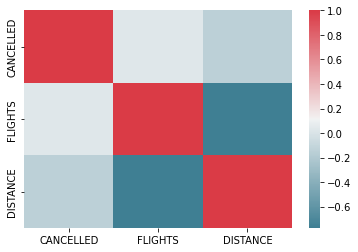

In [67]:
import seaborn as sns
corr = daily_df[["CANCELLED", "FLIGHTS", "DISTANCE"]].corr()
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [77]:
daily_flights_1d = daily_df.FLIGHTS.to_numpy()
daily_flights = np.expand_dims(daily_flights_1d, axis=1)
daily_distance = daily_df.DISTANCE.to_numpy()
daily_distance[:10], daily_flights[:10]

(array([910.0228436, 888.7602215, 877.9350537, 860.5237472, 864.5093569,
        868.3123229, 916.6221719, 873.8383533, 842.1752433, 836.7609466]),
 array([[13877],
        [15531],
        [15074],
        [14528],
        [14695],
        [14120],
        [10608],
        [13579],
        [15002],
        [14114]]))

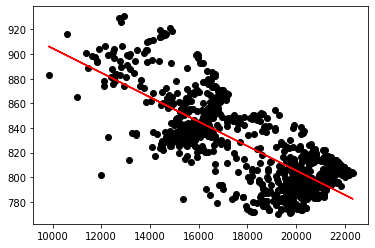

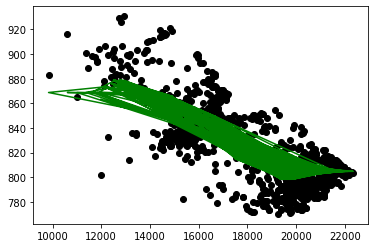

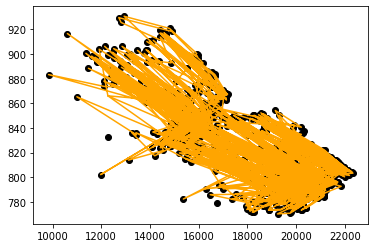

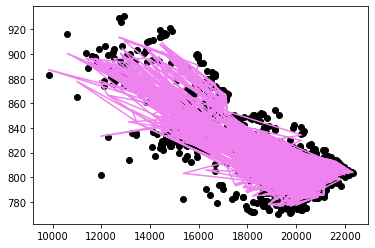

In [74]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

linear_regression = linear_model.LinearRegression()
linear_regression.fit(daily_flights, daily_distance)
ada_boost_regressor = AdaBoostRegressor()
ada_boost_regressor.fit(daily_flights, daily_distance)
extra_trees_regressor = ExtraTreesRegressor()
extra_trees_regressor.fit(daily_flights, daily_distance)
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(daily_flights, daily_distance)

plt.scatter(daily_flights_1d, daily_distance, color="black")
plt.plot(daily_flights_1d, linear_regression.predict(daily_flights), color="red")
plt.show()
plt.scatter(daily_flights_1d, daily_distance, color="black")
plt.plot(daily_flights_1d, ada_boost_regressor.predict(daily_flights), color="green")
plt.show()
plt.scatter(daily_flights_1d, daily_distance, color="black")
plt.plot(daily_flights_1d, extra_trees_regressor.predict(daily_flights), color="orange")
plt.show()
plt.scatter(daily_flights_1d, daily_distance, color="black")
plt.plot(daily_flights_1d, random_forest_regressor.predict(daily_flights), color="violet")
plt.show()

In [47]:
monthly_df = pd.read_csv("/kaggle/input/flights-2017-2019/Monthly-stats.csv", sep=",")
monthly_df

,year,month,flights,distance
0,2017,1,441131,26577.789824
1,2017,2,404205,23789.938702
2,2017,3,480070,26486.162291
3,2017,4,460931,25700.390905
4,2017,5,482444,26380.880091
5,2017,6,488887,26109.712089
6,2017,7,503313,27309.899691
7,2017,8,499444,26998.432703
8,2017,9,443384,25404.675682
9,2017,10,476494,26199.605137


In [48]:
cond_2017_2018 = ((monthly_df.year == 2017) | (monthly_df.year == 2018))

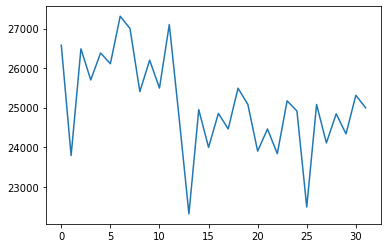

In [49]:
distance = monthly_df["distance"].to_numpy()
plt.plot(distance)
plt.show()

In [50]:
dates = monthly_df[["year", "month"]].to_numpy()
dates[cond_2017_2018, :]

array([[2017,    1],
       [2017,    2],
       [2017,    3],
       [2017,    4],
       [2017,    5],
       [2017,    6],
       [2017,    7],
       [2017,    8],
       [2017,    9],
       [2017,   10],
       [2017,   11],
       [2017,   12],
       [2018,    1],
       [2018,    2],
       [2018,    3],
       [2018,    4],
       [2018,    5],
       [2018,    6],
       [2018,    7],
       [2018,    8],
       [2018,    9],
       [2018,   10],
       [2018,   11],
       [2018,   12]])

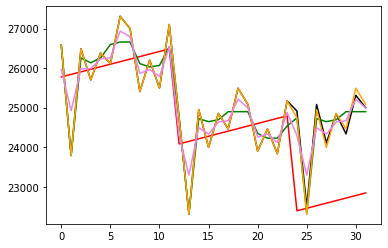

In [65]:
#from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.ensemble import RandomForestRegressor
linear_regression = linear_model.LinearRegression()
linear_regression.fit(dates[cond_2017_2018, :], distance[cond_2017_2018])
ada_boost_regressor = AdaBoostRegressor()
ada_boost_regressor.fit(dates[cond_2017_2018, :], distance[cond_2017_2018])
extra_trees_regressor = ExtraTreesRegressor()
extra_trees_regressor.fit(dates[cond_2017_2018, :], distance[cond_2017_2018])
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(dates[cond_2017_2018, :], distance[cond_2017_2018])
plt.plot(linear_regression.predict(dates), color="red")
plt.plot(ada_boost_regressor.predict(dates), color="green")
plt.plot(extra_trees_regressor.predict(dates), color="orange")
plt.plot(random_forest_regressor.predict(dates), color="violet")
plt.show()